##Libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

## Data Exploration

In [2]:

leads = pd.read_csv('/content/leads.csv')
offers = pd.read_csv('/content/offers.csv')

In [3]:
leads.head()



,Id,First Name,Use Case,Source,Status,Discarded/Nurturing Reason,Acquisition Campaign,Created Date,Converted,City
0,23okrabh,NaN,Corporate Events,Inbound,Nurturing,Not Fit,NaN,2018-05-26,0,Chicago
1,NaN,Taylor1 Harris1,NaN,Inbound,Discarded,Not feeling,Event Management Guide,2018-10-17,0,Denver
2,hbzt0kp1,Alex6 Jackson3,NaN,Inbound,Nurturing,Competitor,NaN,2019-03-29,0,Denver
3,velluwdq,Bailey2 Taylor6,Corporate Events,Inbound,Discarded,Not Target,NaN,2018-05-26,0,NaN
4,NaN,Drew5 Wilson5,Corporate Events,Inbound,Nurturing,Competitor,NaN,2018-10-17,0,NaN


In [4]:
leads.columns = ['Id'] + [col + "_leads" for col in leads.columns[1:]]

Delete NaN values for  Id column

In [5]:
leads_df = leads.dropna(subset=['Id'])
leads_df


,Id,First Name_leads,Use Case_leads,Source_leads,Status_leads,Discarded/Nurturing Reason_leads,Acquisition Campaign_leads,Created Date_leads,Converted_leads,City_leads
0,23okrabh,NaN,Corporate Events,Inbound,Nurturing,Not Fit,NaN,2018-05-26,0,Chicago
2,hbzt0kp1,Alex6 Jackson3,NaN,Inbound,Nurturing,Competitor,NaN,2019-03-29,0,Denver
3,velluwdq,Bailey2 Taylor6,Corporate Events,Inbound,Discarded,Not Target,NaN,2018-05-26,0,NaN
5,vwm9vcdc,Harper11 Johnson11,NaN,Inbound,Nurturing,Not the right moment,NaN,2019-03-29,0,NaN
8,kbfjr4vz,Drew6 Taylor17,NaN,Inbound,Nurturing,Not feeling,NaN,2019-03-29,0,Denver
...,...,...,...,...,...,...,...,...,...,...
61634,lpb8obv3,NaN,Corporate Events,Outbound,New,NaN,Digital kit,2020-10-27,0,Phoenix
61635,mzcq31rg,NaN,NaN,Outbound,New,NaN,ArtFair,2020-10-27,0,NaN
61636,2ajg0z5w,NaN,Corporate Events,Outbound,New,NaN,NaN,2020-10-27,0,NaN
61637,k6wq2pi9,NaN,NaN,Outbound,New,NaN,VirtualMeetups,2020-10-27,0,Charlotte


In [6]:
leads_df.dtypes

Id                                  object
First Name_leads                    object
Use Case_leads                      object
Source_leads                        object
Status_leads                        object
Discarded/Nurturing Reason_leads    object
Acquisition Campaign_leads          object
Created Date_leads                  object
Converted_leads                      int64
City_leads                          object
dtype: object

In [7]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61639 entries, 0 to 61638
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Id                                43972 non-null  object
 1   First Name_leads                  53240 non-null  object
 2   Use Case_leads                    44918 non-null  object
 3   Source_leads                      60293 non-null  object
 4   Status_leads                      61639 non-null  object
 5   Discarded/Nurturing Reason_leads  45169 non-null  object
 6   Acquisition Campaign_leads        25047 non-null  object
 7   Created Date_leads                61639 non-null  object
 8   Converted_leads                   61639 non-null  int64 
 9   City_leads                        34929 non-null  object
dtypes: int64(1), object(9)
memory usage: 4.7+ MB


In [8]:
offers



,Id,Use Case,Status,Created Date,Close Date,Price,Discount code,Pain,Loss Reason
0,doqyhjtv,Educational Seminars,Closed Won,2019-11-17,2019-11-17,300.0,SAVEMORE50,operations,NaN
1,NaN,Sports Events,Closed Lost,2019-11-24,2019-11-25,150.0,NaN,operations,price
2,NaN,Sports Events,Closed Lost,2019-11-24,2019-11-25,768.0,HALFYEAR20G,operations,no response
3,cturqi48,Corporate Events,Closed Won,2019-05-07,2019-05-07,240.0,DISCOUNT50POWER,financial control,NaN
4,NaN,Sports Events,Closed Lost,2019-11-17,2019-11-25,240.0,SAVEMONTH50G,financial control,no response
...,...,...,...,...,...,...,...,...,...
6125,NaN,Corporate Events,Closed Lost,2019-05-20,2019-05-21,120.0,NaN,operations,price
6126,NaN,Wedding Planning,Closed Won,2019-05-20,2019-05-20,NaN,NaN,NaN,NaN
6127,88tre7ve,Corporate Events,Closed Lost,2019-05-20,2019-05-20,768.0,2SEMESTERS20OFF,operations,no response
6128,2d15fo90,Corporate Events,Closed Lost,2019-05-20,2019-05-26,1344.0,NaN,operations,no product fit


In [9]:
offers.columns = ['Id'] + [col + "_offers" for col in offers.columns[1:]]

Delete NaN values for Id column

In [10]:
offers_df = offers.dropna(subset=['Id'])
offers_df

,Id,Use Case_offers,Status_offers,Created Date_offers,Close Date_offers,Price_offers,Discount code_offers,Pain_offers,Loss Reason_offers
0,doqyhjtv,Educational Seminars,Closed Won,2019-11-17,2019-11-17,300.0,SAVEMORE50,operations,NaN
3,cturqi48,Corporate Events,Closed Won,2019-05-07,2019-05-07,240.0,DISCOUNT50POWER,financial control,NaN
6,9pl1etry,Corporate Events,Closed Won,2019-12-18,2019-12-18,768.0,2SEMESTERS20OFF,operations,NaN
7,7tkbogep,Corporate Events,Closed Won,2019-11-18,2019-11-18,300.0,MONTH50CUTBACK,operations,NaN
8,locj094j,Corporate Events,Closed Won,2019-11-18,2019-11-19,300.0,MONTH50CUTBACK,quality of delivery,NaN
...,...,...,...,...,...,...,...,...,...
6123,uxztx07y,Corporate Events,Closed Lost,2019-05-20,2019-05-20,0.0,NaN,financial control,no response
6124,ut9flvo3,Corporate Events,Closed Won,2019-05-20,2019-05-20,150.0,QUARTERLY75OFF,operations,NaN
6127,88tre7ve,Corporate Events,Closed Lost,2019-05-20,2019-05-20,768.0,2SEMESTERS20OFF,operations,no response
6128,2d15fo90,Corporate Events,Closed Lost,2019-05-20,2019-05-26,1344.0,NaN,operations,no product fit


In [11]:
offers_df.dtypes

Id                       object
Use Case_offers          object
Status_offers            object
Created Date_offers      object
Close Date_offers        object
Price_offers            float64
Discount code_offers     object
Pain_offers              object
Loss Reason_offers       object
dtype: object

In [12]:
offers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4962 entries, 0 to 6129
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    4962 non-null   object 
 1   Use Case_offers       4932 non-null   object 
 2   Status_offers         4962 non-null   object 
 3   Created Date_offers   4962 non-null   object 
 4   Close Date_offers     4962 non-null   object 
 5   Price_offers          4848 non-null   float64
 6   Discount code_offers  3969 non-null   object 
 7   Pain_offers           4415 non-null   object 
 8   Loss Reason_offers    1634 non-null   object 
dtypes: float64(1), object(8)
memory usage: 387.7+ KB


##Data Preprocessing

Inner merge for extractiong the relation between leads and offers

In [13]:
merged_data = pd.merge(leads_df, offers_df, on='Id', how='inner', suffixes=('_lead', '_offer'))



In [14]:
merged_data


,Id,First Name_leads,Use Case_leads,Source_leads,Status_leads,Discarded/Nurturing Reason_leads,Acquisition Campaign_leads,Created Date_leads,Converted_leads,City_leads,Use Case_offers,Status_offers,Created Date_offers,Close Date_offers,Price_offers,Discount code_offers,Pain_offers,Loss Reason_offers
0,su014jpj,Devon3 Martinez20,Educational Seminars,Inbound,Qualified,NaN,NaN,2018-10-17,1,New York,Educational Seminars,Closed Lost,2018-10-20,2018-02-07,240.0,NaN,quality of delivery,no response
1,uo3alag3,Devon6 Taylor13,Corporate Events,Inbound,Qualified,NaN,NaN,2018-10-17,1,NaN,Corporate Events,Closed Lost,2018-10-20,2018-10-20,200.0,NaN,financial control,lost to competitor
2,2exqos94,NaN,Corporate Events,Inbound,Qualified,NaN,NaN,2018-01-01,1,Chicago,Corporate Events,Checkbox,2018-01-01,2018-01-01,960.0,SEMESTER20DEALAGAIN,NaN,NaN
3,387283th,Frankie6 Moore18,Sports Events,Inbound,Qualified,NaN,NaN,2018-10-17,1,Chicago,Sports Events,Closed Won,2018-10-21,2018-10-21,240.0,SAVEMONTH50G,operations,NaN
4,ipkk8eiv,Devon12 Williams20,Corporate Events,Inbound,Qualified,NaN,NaN,2018-01-01,1,Chicago,Corporate Events,Closed Lost,2018-01-01,2018-06-20,360.0,SAVE25LESS,operations,price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,z35lw3kn,Alex15 Smith12,Corporate Events,Outbound,Qualified,NaN,VirtualMeetups,2020-09-26,1,Jacksonville,Corporate Events,Closed Lost,2020-09-26,2020-09-26,0.0,NaN,financial control,no product fit
3797,b1rznob8,Riley10 Taylor6,Sports Events,Inbound,Qualified,NaN,FestivalFever,2020-09-26,1,NaN,Sports Events,Closed Won,2020-09-26,2020-09-26,240.0,SAVEMONTH50G,operations,NaN
3798,3iab5imb,NaN,Corporate Events,Outbound,Qualified,NaN,TradeShow 8,2020-10-27,1,NaN,Corporate Events,Negotiation,2020-10-27,2020-10-27,300.0,MONTH50CUTBACK,operations,NaN
3799,vxabmzpv,Drew8 Smith11,Sports Events,Outbound,Qualified,NaN,TradeShow 5,2020-10-27,1,Chicago,Sports Events,Closed Won,2020-10-27,2020-10-27,300.0,SAVEMORE50,NaN,NaN


In [15]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3801 entries, 0 to 3800
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Id                                3801 non-null   object 
 1   First Name_leads                  2972 non-null   object 
 2   Use Case_leads                    3736 non-null   object 
 3   Source_leads                      3799 non-null   object 
 4   Status_leads                      3801 non-null   object 
 5   Discarded/Nurturing Reason_leads  33 non-null     object 
 6   Acquisition Campaign_leads        1043 non-null   object 
 7   Created Date_leads                3801 non-null   object 
 8   Converted_leads                   3801 non-null   int64  
 9   City_leads                        2521 non-null   object 
 10  Use Case_offers                   3779 non-null   object 
 11  Status_offers                     3801 non-null   object 
 12  Create

In [16]:

#replace  the NaN values  in use case leads  with Unknow
merged_data['Use Case_leads'].fillna('Unknown', inplace=True)

#replace  the NaN values  in use case leads  with Unknow
merged_data['First Name_leads'].fillna('No name', inplace=True)

#replace  the NaN values whit the mode
mode_value = merged_data['Source_leads'].mode().iloc[0]
merged_data['Source_leads'].fillna(mode_value, inplace=True)

#replace  the NaN values  in City_leads  with Unknow City
merged_data['City_leads'].fillna('Unknow City', inplace=True)

#replace  the NaN values  in Acquisition Campaign_leads  with no Campaign
merged_data['Acquisition Campaign_leads'].fillna('no Campaign', inplace=True)

#replace  the NaN values  in Case_offers  with the mode
mode_value = merged_data['Use Case_offers'].mode().iloc[0]
merged_data['Use Case_offers'].fillna(mode_value, inplace=True)

#replace  the NaN values whit the mean
mean_price = merged_data['Price_offers'].mean()
merged_data['Price_offers'].fillna(mean_price, inplace=True)

#replace  the NaN values  in Loss Reason_offers  with Unknow reason
merged_data['Loss Reason_offers'].fillna('Unknown reason', inplace=True)

# replace  discount with 1  and no discount with 0
merged_data['Discount_Code_Indicator'] = merged_data['Discount code_offers'].notna().astype(int)

#replace  the NaN values  in Pain_offers  with other reason
merged_data['Pain_offers'].fillna('other', inplace=True)

In [17]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3801 entries, 0 to 3800
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Id                                3801 non-null   object 
 1   First Name_leads                  3801 non-null   object 
 2   Use Case_leads                    3801 non-null   object 
 3   Source_leads                      3801 non-null   object 
 4   Status_leads                      3801 non-null   object 
 5   Discarded/Nurturing Reason_leads  33 non-null     object 
 6   Acquisition Campaign_leads        3801 non-null   object 
 7   Created Date_leads                3801 non-null   object 
 8   Converted_leads                   3801 non-null   int64  
 9   City_leads                        3801 non-null   object 
 10  Use Case_offers                   3801 non-null   object 
 11  Status_offers                     3801 non-null   object 
 12  Create

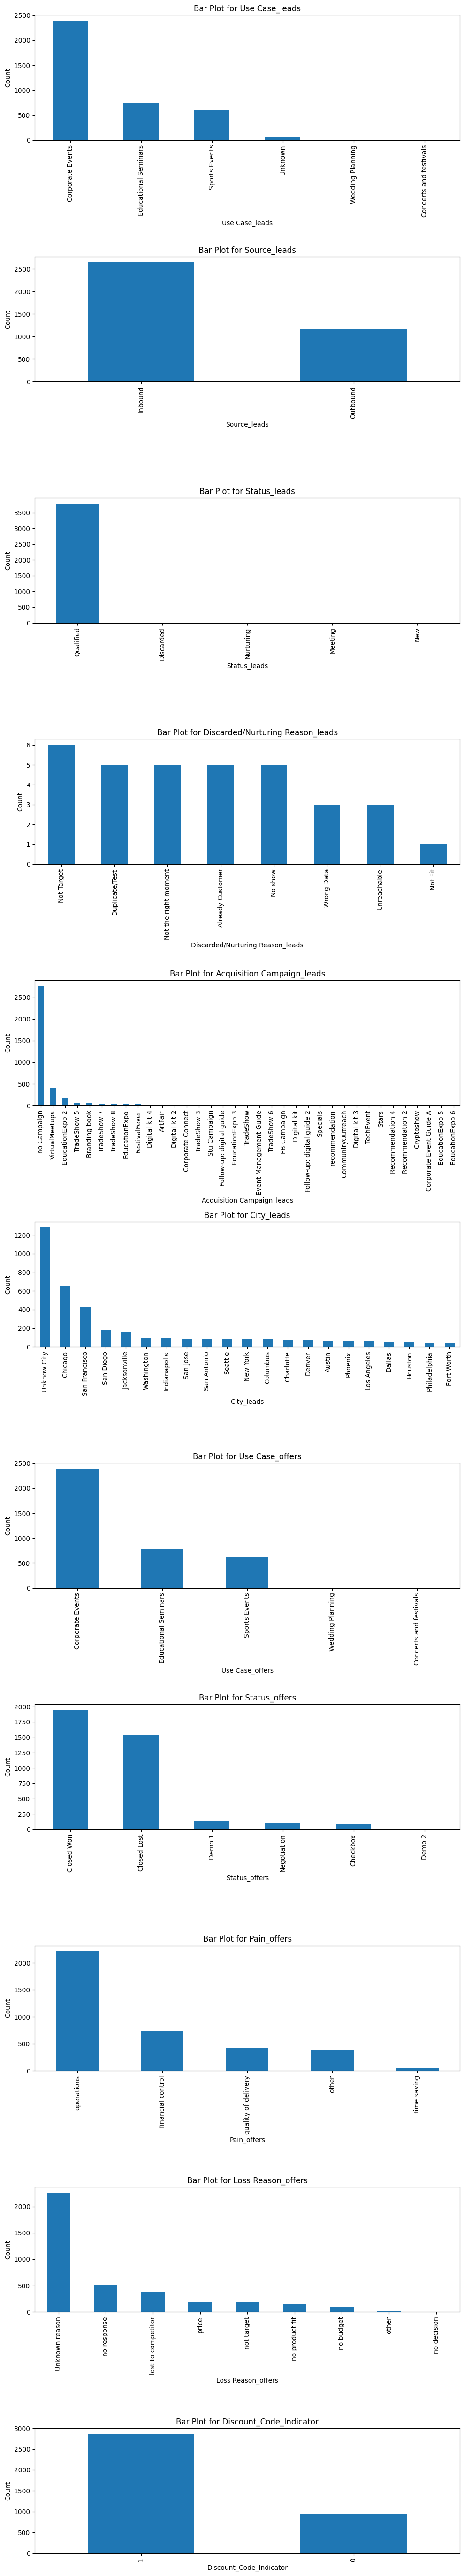

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming merged_data is your DataFrame
# List of categorical columns
categorical_columns = ['Use Case_leads', 'Source_leads', 'Status_leads', 'Discarded/Nurturing Reason_leads',
                        'Acquisition Campaign_leads', 'City_leads', 'Use Case_offers', 'Status_offers',
                         'Pain_offers', 'Loss Reason_offers','Discount_Code_Indicator']

# Create subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 5 * len(categorical_columns)))

# Loop through each categorical column and plot a bar plot
for i, column in enumerate(categorical_columns):
    ax = axes[i]
    merged_data[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Bar Plot for {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


In [19]:
merged_data

,Id,First Name_leads,Use Case_leads,Source_leads,Status_leads,Discarded/Nurturing Reason_leads,Acquisition Campaign_leads,Created Date_leads,Converted_leads,City_leads,Use Case_offers,Status_offers,Created Date_offers,Close Date_offers,Price_offers,Discount code_offers,Pain_offers,Loss Reason_offers,Discount_Code_Indicator
0,su014jpj,Devon3 Martinez20,Educational Seminars,Inbound,Qualified,NaN,no Campaign,2018-10-17,1,New York,Educational Seminars,Closed Lost,2018-10-20,2018-02-07,240.0,NaN,quality of delivery,no response,0
1,uo3alag3,Devon6 Taylor13,Corporate Events,Inbound,Qualified,NaN,no Campaign,2018-10-17,1,Unknow City,Corporate Events,Closed Lost,2018-10-20,2018-10-20,200.0,NaN,financial control,lost to competitor,0
2,2exqos94,No name,Corporate Events,Inbound,Qualified,NaN,no Campaign,2018-01-01,1,Chicago,Corporate Events,Checkbox,2018-01-01,2018-01-01,960.0,SEMESTER20DEALAGAIN,other,Unknown reason,1
3,387283th,Frankie6 Moore18,Sports Events,Inbound,Qualified,NaN,no Campaign,2018-10-17,1,Chicago,Sports Events,Closed Won,2018-10-21,2018-10-21,240.0,SAVEMONTH50G,operations,Unknown reason,1
4,ipkk8eiv,Devon12 Williams20,Corporate Events,Inbound,Qualified,NaN,no Campaign,2018-01-01,1,Chicago,Corporate Events,Closed Lost,2018-01-01,2018-06-20,360.0,SAVE25LESS,operations,price,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,z35lw3kn,Alex15 Smith12,Corporate Events,Outbound,Qualified,NaN,VirtualMeetups,2020-09-26,1,Jacksonville,Corporate Events,Closed Lost,2020-09-26,2020-09-26,0.0,NaN,financial control,no product fit,0
3797,b1rznob8,Riley10 Taylor6,Sports Events,Inbound,Qualified,NaN,FestivalFever,2020-09-26,1,Unknow City,Sports Events,Closed Won,2020-09-26,2020-09-26,240.0,SAVEMONTH50G,operations,Unknown reason,1
3798,3iab5imb,No name,Corporate Events,Outbound,Qualified,NaN,TradeShow 8,2020-10-27,1,Unknow City,Corporate Events,Negotiation,2020-10-27,2020-10-27,300.0,MONTH50CUTBACK,operations,Unknown reason,1
3799,vxabmzpv,Drew8 Smith11,Sports Events,Outbound,Qualified,NaN,TradeShow 5,2020-10-27,1,Chicago,Sports Events,Closed Won,2020-10-27,2020-10-27,300.0,SAVEMORE50,other,Unknown reason,1


In [20]:
merged_data['Pain_offers'].value_counts()

operations             2207
financial control       741
quality of delivery     420
other                   389
time saving              44
Name: Pain_offers, dtype: int64

In [21]:
use_case_leads_mapping = {
    'Corporate Events': 1,
    'Educational Seminars': 2,
    'Sports Events': 3,
    'Unknown': 4,
    'Wedding Planning': 5,
    'Concerts and festivals': 6
}


Source_leads_mapping = {'Inbound': 1, 'Outbound': 0}

Status_leads_mapping = {'Qualified': 1, 'Discarded': 2, 'Nurturing': 3, 'Meeting': 4, 'New': 5}


campaign_mapping = {
    'no Campaign': 1,
    'VirtualMeetups': 2,
    'EducationExpo 2': 3,
    'TradeShow 5': 4,
    'Branding book': 5,
    'TradeShow 7': 6,
    'TradeShow 8': 7,
    'EducationExpo': 8,
    'FestivalFever': 9,
    'Digital kit 4': 10,
    'ArtFair': 11,
    'Digital kit 2': 12,
    'Corporate Connect': 13,
    'Stu Campaign': 14,
    'TradeShow 3': 15,
    'Follow-up: digital guide': 16,
    'EducationExpo 3': 17,
    'Event Management Guide': 18,
    'TradeShow': 19,
    'TradeShow 6': 20,
    'FB Campaign': 21,
    'Digital kit': 22,
    'Follow-up: digital guide 2': 23,
    'Specials': 24,
    'recommendation': 25,
    'CommunityOutreach': 26,
    'Digital kit 3': 27,
    'TechEvent': 28,
    'Stars': 29,
    'Recommendation 4': 30,
    'Recommendation 2': 31,
    'Cryptoshow': 32,
    'Corporate Event Guide A': 33,
    'EducationExpo 5': 34,
    'EducationExpo 6': 35
}

city_mapping = {
    'Unknow City': 1,
    'Chicago': 2,
    'San Francisco': 3,
    'San Diego': 4,
    'Jacksonville': 5,
    'Washington': 6,
    'Indianapolis': 7,
    'San Jose': 8,
    'San Antonio': 9,
    'New York': 10,
    'Seattle': 11,
    'Columbus': 12,
    'Charlotte': 13,
    'Denver': 14,
    'Austin': 15,
    'Phoenix': 16,
    'Los Angeles': 17,
    'Dallas': 18,
    'Houston': 19,
    'Philadelphia': 20,
    'Fort Worth': 21
}
use_case_offers_mapping = {
    'Corporate Events': 1,
    'Educational Seminars': 2,
    'Sports Events': 3,
    'Wedding Planning': 4,
    'Concerts and festivals': 5
}
status_offers_mapping = {
    'Closed Won': 1,
    'Closed Lost': 2,
    'Demo 1': 3,
    'Negotiation': 4,
    'Checkbox': 5,
    'Demo 2': 6
}



Pain_offers_mapping = {
    "operations": 1,
    "financial control": 2,
    "quality of delivery": 3,
    "other": 4,
    "time saving": 5
}

loss_reason_offers_mapping = {
    'Unknown reason': 1,
    'no response': 2,
    'lost to competitor': 3,
    'price': 4,
    'not target': 5,
    'no product fit': 6,
    'no budget': 7,
    'other': 8,
    'no decision': 9
}

In [22]:
merged_data.replace({
    'Use Case_leads': use_case_leads_mapping,
    'Source_leads': Source_leads_mapping,  # Corrected variable name
    'Status_leads': Status_leads_mapping,
    'Acquisition Campaign_leads': campaign_mapping,
    'City_leads': city_mapping,
    'Use Case_offers': use_case_offers_mapping,
    'Status_offers': status_offers_mapping,
    'Pain_offers': Pain_offers_mapping,  # Corrected variable name
    'Loss Reason_offers': loss_reason_offers_mapping
}, inplace=True)


In [23]:
merged_data

,Id,First Name_leads,Use Case_leads,Source_leads,Status_leads,Discarded/Nurturing Reason_leads,Acquisition Campaign_leads,Created Date_leads,Converted_leads,City_leads,Use Case_offers,Status_offers,Created Date_offers,Close Date_offers,Price_offers,Discount code_offers,Pain_offers,Loss Reason_offers,Discount_Code_Indicator
0,su014jpj,Devon3 Martinez20,2,1,1,NaN,1,2018-10-17,1,10,2,2,2018-10-20,2018-02-07,240.0,NaN,3,2,0
1,uo3alag3,Devon6 Taylor13,1,1,1,NaN,1,2018-10-17,1,1,1,2,2018-10-20,2018-10-20,200.0,NaN,2,3,0
2,2exqos94,No name,1,1,1,NaN,1,2018-01-01,1,2,1,5,2018-01-01,2018-01-01,960.0,SEMESTER20DEALAGAIN,4,1,1
3,387283th,Frankie6 Moore18,3,1,1,NaN,1,2018-10-17,1,2,3,1,2018-10-21,2018-10-21,240.0,SAVEMONTH50G,1,1,1
4,ipkk8eiv,Devon12 Williams20,1,1,1,NaN,1,2018-01-01,1,2,1,2,2018-01-01,2018-06-20,360.0,SAVE25LESS,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,z35lw3kn,Alex15 Smith12,1,0,1,NaN,2,2020-09-26,1,5,1,2,2020-09-26,2020-09-26,0.0,NaN,2,6,0
3797,b1rznob8,Riley10 Taylor6,3,1,1,NaN,9,2020-09-26,1,1,3,1,2020-09-26,2020-09-26,240.0,SAVEMONTH50G,1,1,1
3798,3iab5imb,No name,1,0,1,NaN,7,2020-10-27,1,1,1,4,2020-10-27,2020-10-27,300.0,MONTH50CUTBACK,1,1,1
3799,vxabmzpv,Drew8 Smith11,3,0,1,NaN,4,2020-10-27,1,2,3,1,2020-10-27,2020-10-27,300.0,SAVEMORE50,4,1,1


##Feature Engineering

In [24]:
# time  bethween  created lead and the offer
merged_data['Created Date_leads'] = pd.to_datetime(merged_data['Created Date_leads'])
merged_data['Created Date_offers'] = pd.to_datetime(merged_data['Created Date_offers'])

# Calculate the time difference between 'Created Date_lead' and 'Created Date_offer'
merged_data['time_between_creation'] = (merged_data['Created Date_offers'] - merged_data['Created Date_leads'])
merged_data['time_between_creation'] = merged_data['time_between_creation'].apply(lambda x: max(x, pd.Timedelta(0)))
merged_data['time_between_creation']= merged_data['time_between_creation'].dt.total_seconds() / (24 * 60 * 60)


In [25]:
merged_data['Close Date_offers'] = pd.to_datetime(merged_data['Close Date_offers'])

# Calculate the time difference between 'Created Date_lead' and 'Created Date_offer'
merged_data['time_between_closeoffer'] = (merged_data['Close Date_offers'] - merged_data['Created Date_offers'])
merged_data['time_between_closeoffer'] = merged_data['time_between_closeoffer'].apply(lambda x: max(x, pd.Timedelta(0)))
merged_data['time_between_closeoffer'] = merged_data['time_between_closeoffer'].dt.total_seconds() / (24 * 60 * 60)


In [26]:
# Assuming 'Close Date_offers' and 'Created Date_leads' are datetime columns
merged_data['time_duration'] = merged_data['Close Date_offers'] - merged_data['Created Date_leads']

# Convert the time duration to numeric representation in days
merged_data['time_duration'] = merged_data['time_duration'].dt.total_seconds() / (24 * 60 * 60)

merged_data['time_duration'] = merged_data['time_duration'].apply(lambda x: max(x, 0))

In [27]:

merged_data

,Id,First Name_leads,Use Case_leads,Source_leads,Status_leads,Discarded/Nurturing Reason_leads,Acquisition Campaign_leads,Created Date_leads,Converted_leads,City_leads,...,Created Date_offers,Close Date_offers,Price_offers,Discount code_offers,Pain_offers,Loss Reason_offers,Discount_Code_Indicator,time_between_creation,time_between_closeoffer,time_duration
0,su014jpj,Devon3 Martinez20,2,1,1,NaN,1,2018-10-17,1,10,...,2018-10-20,2018-02-07,240.0,NaN,3,2,0,3.0,0.0,0.0
1,uo3alag3,Devon6 Taylor13,1,1,1,NaN,1,2018-10-17,1,1,...,2018-10-20,2018-10-20,200.0,NaN,2,3,0,3.0,0.0,3.0
2,2exqos94,No name,1,1,1,NaN,1,2018-01-01,1,2,...,2018-01-01,2018-01-01,960.0,SEMESTER20DEALAGAIN,4,1,1,0.0,0.0,0.0
3,387283th,Frankie6 Moore18,3,1,1,NaN,1,2018-10-17,1,2,...,2018-10-21,2018-10-21,240.0,SAVEMONTH50G,1,1,1,4.0,0.0,4.0
4,ipkk8eiv,Devon12 Williams20,1,1,1,NaN,1,2018-01-01,1,2,...,2018-01-01,2018-06-20,360.0,SAVE25LESS,1,4,1,0.0,170.0,170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,z35lw3kn,Alex15 Smith12,1,0,1,NaN,2,2020-09-26,1,5,...,2020-09-26,2020-09-26,0.0,NaN,2,6,0,0.0,0.0,0.0
3797,b1rznob8,Riley10 Taylor6,3,1,1,NaN,9,2020-09-26,1,1,...,2020-09-26,2020-09-26,240.0,SAVEMONTH50G,1,1,1,0.0,0.0,0.0
3798,3iab5imb,No name,1,0,1,NaN,7,2020-10-27,1,1,...,2020-10-27,2020-10-27,300.0,MONTH50CUTBACK,1,1,1,0.0,0.0,0.0
3799,vxabmzpv,Drew8 Smith11,3,0,1,NaN,4,2020-10-27,1,2,...,2020-10-27,2020-10-27,300.0,SAVEMORE50,4,1,1,0.0,0.0,0.0


In [28]:
columns_to_drop = ['Id', 'First Name_leads', 'Created Date_leads', 'Created Date_offers','Discarded/Nurturing Reason_leads', 'Close Date_offers', 'Discount code_offers']
merged_data.drop(columns=columns_to_drop, inplace=True)

In [29]:

merged_data

,Use Case_leads,Source_leads,Status_leads,Acquisition Campaign_leads,Converted_leads,City_leads,Use Case_offers,Status_offers,Price_offers,Pain_offers,Loss Reason_offers,Discount_Code_Indicator,time_between_creation,time_between_closeoffer,time_duration
0,2,1,1,1,1,10,2,2,240.0,3,2,0,3.0,0.0,0.0
1,1,1,1,1,1,1,1,2,200.0,2,3,0,3.0,0.0,3.0
2,1,1,1,1,1,2,1,5,960.0,4,1,1,0.0,0.0,0.0
3,3,1,1,1,1,2,3,1,240.0,1,1,1,4.0,0.0,4.0
4,1,1,1,1,1,2,1,2,360.0,1,4,1,0.0,170.0,170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,1,0,1,2,1,5,1,2,0.0,2,6,0,0.0,0.0,0.0
3797,3,1,1,9,1,1,3,1,240.0,1,1,1,0.0,0.0,0.0
3798,1,0,1,7,1,1,1,4,300.0,1,1,1,0.0,0.0,0.0
3799,3,0,1,4,1,2,3,1,300.0,4,1,1,0.0,0.0,0.0


In [30]:
merged_data['Status_leads'].value_counts()

1    3782
2       9
3       6
4       3
5       1
Name: Status_leads, dtype: int64

In [31]:
merged_data['Status_offers'].replace({3: 1, 6: 1, 4: 2, 5: 2}, inplace=True)


In [32]:
merged_data['Status_offers'].value_counts()

1    2079
2    1722
Name: Status_offers, dtype: int64

In [33]:
merged_data['Status_offers'].replace({2: 0}, inplace=True)

In [34]:
merged_data['Status_offers'].value_counts()

1    2079
0    1722
Name: Status_offers, dtype: int64

In [35]:
merged_data.to_csv('merged_data.csv', index=False)


## Split Data

In [36]:
X = merged_data.drop("Status_offers", axis=1)  # Variables de entrada menos la última columna
Y = merged_data["Status_offers"]  # Última columna riesgo del crédito

Xtv, Xtest, ytv, ytest = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=1)

print(Xtv.shape, ': dimensión de datos de entrada para entrenamiento y validación')
print(Xtest.shape, ': dimensión de datos de entrada para prueba')

print(ytv.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(ytest.shape, ': dimensión de variable de salida para prueba')


(3040, 14) : dimensión de datos de entrada para entrenamiento y validación
(761, 14) : dimensión de datos de entrada para prueba
(3040,) : dimensión de variable de salida para entrenamiento y validación
(761,) : dimensión de variable de salida para prueba


Check that it is balanced

In [37]:
ytv.sum() / ytv.shape[0]

0.5470394736842106

In [40]:
from sklearn.preprocessing import FunctionTransformer

# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(steps=[('impMediana', SimpleImputer(strategy='median')),
                                ('escalaNum', MinMaxScaler(feature_range=(1, 2)))])
num_pipeline_nombres = ['Price_offers', 'time_between_creation', 'Converted_leads', 'time_between_closeoffer',
                         'time_duration']

# Transformaciones a factores categóricos de entrada (usando get_dummies en lugar de OneHotEncoder):
catImp_pipeline = Pipeline(steps=[('impModa', SimpleImputer(strategy='most_frequent'))])
catImp_pipeline_nombres = ['Source_leads', 'Discount_Code_Indicator']

# Usar get_dummies en lugar de OneHotEncoder
catOHE_pipeline = Pipeline(steps=[('getDummies', FunctionTransformer(lambda x: pd.get_dummies(x, drop_first=True)))])
catOHE_pipeline_nombres = ['Use Case_leads', 'Status_leads',
                           'Acquisition Campaign_leads', 'City_leads',
                           'Use Case_offers', 'Pain_offers',
                           'Loss Reason_offers']

# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers=[('numpipe', num_pipeline, num_pipeline_nombres),
                                                      ('catimp', catImp_pipeline, catImp_pipeline_nombres),
                                                      ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],
                                        remainder='passthrough')



## Choose a Model

In [41]:
from sklearn.ensemble import RandomForestClassifier
def get_models():
    modelos = list()
    nombres = list()

    # LR - Regresión Logística:
    modelos.append(LogisticRegression(solver='liblinear'))
    nombres.append('LR')

    # DT - Árbol de Decisión:
    modelos.append(DecisionTreeClassifier())
    nombres.append('DT')

    # MLP - Red Neuronal Artificial / Perceptrón Lineal Multicapa:
    modelos.append(MLPClassifier(hidden_layer_sizes=(30,), max_iter=3000))
    nombres.append('MLP')

    # SVM - Máquina de Vector Soporte:
    modelos.append(SVC(gamma='scale'))
    nombres.append('SVM')

    # kNN - k-Vecinos más cercanos:
    modelos.append(KNeighborsClassifier())
    nombres.append('kNN')
    # Random Forest - Bosque Aleatorio:
    modelos.append(RandomForestClassifier())
    nombres.append('RandomForest')

    return modelos, nombres


##  Evaluate the Model

In [59]:

modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()

for i in range(len(modelos)):

  # Creamos un pipeline que incluye las transformaciones y el modelo actual
  pipeline = Pipeline(steps=[('ct', columnasTransformer), ('m', modelos[i])])

  # Configuramos la validación cruzada
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)

  # Evaluamos el modelo utilizando validación cruzada y obtenemos los resultados
  scores = cross_val_score(pipeline, Xtv, np.ravel(ytv), scoring='accuracy', cv=cv)

  # Almacenamos los resultados
  resultados.append(scores)

  # Imprimimos el rendimiento del modelo
  print('>> %s: %.3f (%.3f)' % (nombres[i], np.mean(scores), np.std(scores)))


>> LR: 0.951 (0.011)
>> DT: 0.909 (0.014)
>> MLP: 0.952 (0.011)
>> SVM: 0.944 (0.011)
>> kNN: 0.898 (0.017)
>> RandomForest: 0.951 (0.009)


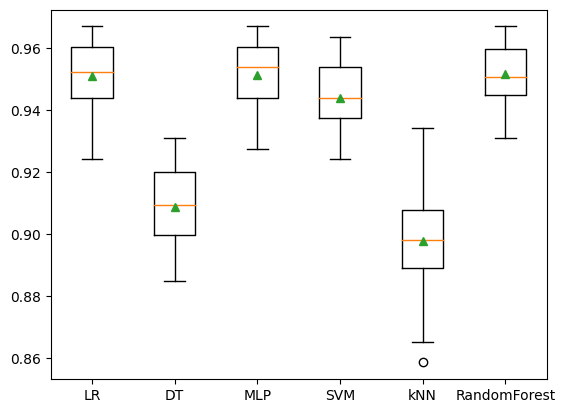

In [43]:
plt.boxplot(resultados, labels=nombres, showmeans=True)
plt.show()

We observe that the logistic regression model obtains the best average performance with respect to the accuracy metric.

## Adjust and Optimize

In [62]:
#from pandas.core.common import random_state

def get_modelsRegs():
  modelos, nombres = list(), list()

  # LR - sin regularización:
  modelos.append(LogisticRegression(penalty='none', solver='lbfgs', max_iter=2000, random_state=1))
  nombres.append('LR')

  # Lasso:
  modelos.append(LogisticRegression(penalty='l1', solver='liblinear', max_iter=2000, C=1., random_state=1))
  nombres.append('LASSO')

  # Ridge:
  modelos.append(LogisticRegression(penalty='l2', solver='liblinear', max_iter=2000, C=10.01, random_state=1))
  nombres.append('RIDGE')

  # Elastic-Net:
  modelos.append(LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga', max_iter=4000, C=1., random_state=1))
  nombres.append('EN')

  return modelos, nombres

>> LR 0.951 (0.009)
>> LASSO 0.951 (0.009)
>> RIDGE 0.951 (0.009)
>> EN 0.951 (0.009)


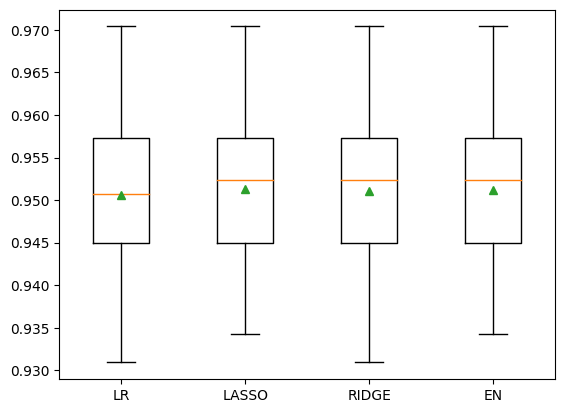

In [71]:
import warnings


# Suppress FutureWarning related to penalty='none'
warnings.simplefilter(action='ignore', category=FutureWarning)

modelos, nombres = get_modelsRegs()
resultados = list()

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=8)
  scores = cross_val_score(pipeline, Xtv, np.ravel(ytv), scoring='accuracy', cv=cv)

  resultados.append(scores)
  print('>> %s %.3f (%.3f)' % (nombres[i], np.mean(scores), np.std(scores)))


plt.boxplot(resultados, labels=nombres, showmeans=True)
plt.show()

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [73]:
# RIDGE - métrica L2:

modelo = LogisticRegression(penalty='l2', max_iter=10000, random_state=1)

dicc_grid = {'C':[0.0001,0.01,0.1,1.0,10.,100.],
             'solver':['newton-cg','lbfgs','liblinear','sag','saga']
             }

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=8)

grid = GridSearchCV(estimator=modelo,
                    param_grid=dicc_grid,
                    cv=cv,
                    scoring='accuracy')

In [74]:
# Transformamos los datos de entrada:
Xx = columnasTransformer.fit_transform(Xtv)

# Llevamos a cabo el proceso de etrenamiento con validación-cruzada y búsqueda de malla.
# Observa que de acuerdo a las opciones incluidas en la malla, se estarán realizando (6)(5)=30
# combinaciones diferentes, además de las (10)(5)=50 particiones de la validación-cruzada,
# lo cual implica también un mayor tiempo de entrenamiento.

grid.fit(Xx, np.ravel(ytv))

print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Mejor valor de exactitud obtenido con la mejor combinación: 0.9513815789473685
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 0.01, 'solver': 'newton-cg'}
Métrica utilizada: accuracy


##Prediction

In [75]:
modelo = LogisticRegression(penalty='l2',
                            max_iter=10000,
                            C=0.01,
                            solver='newton-cg',
                            random_state=1)

# Entrenamos el modelo por última vez con los datos de entrenamiento y validación conjuntos:
Xct = columnasTransformer.fit(Xtv)
Xxt = Xct.transform(Xtv)
modelo.fit(Xxt, np.ravel(ytv))

# Transformamos los datos de prueba y los utilizamos por primera vez para obtener sus predicciones
# y desempeño del modelo:

Xxtest = Xct.transform(Xtest)
print(modelo.score(Xxtest, np.ravel(ytest)))

0.9526938239159002


In [76]:
pp = modelo.predict(Xxtest)
cm = confusion_matrix(ytest, pp)
print(cm)

[[309  36]
 [  0 416]]


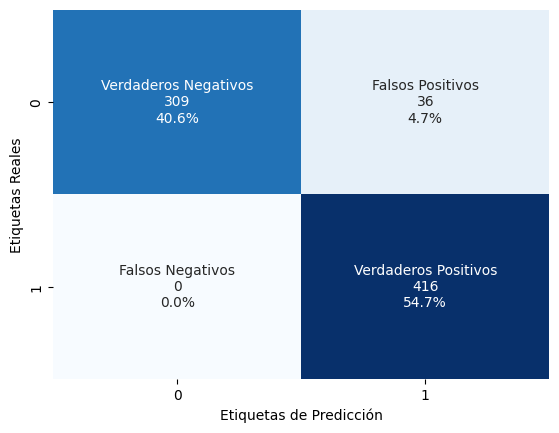

In [77]:
txt = ['Verdaderos Negativos','Falsos Positivos','Falsos Negativos','Verdaderos Positivos']
frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)
ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
plt.show()